In [1]:
import pandas as pd

#### Convert column to datetime format

In [4]:
df = pd.DataFrame({'a':['2019-01-01 14:13', '2019-02-01 14:13'],
                  'b':[1546351980, 1549030380]})
df

,a,b
0,2019-01-01 14:13,1546351980
1,2019-02-01 14:13,1549030380


In [5]:
df.dtypes

a    object
b     int64
dtype: object

In [7]:
df['a_asdate'] = pd.to_datetime(df['a'], format='%Y-%m-%d %H:%M')
df['b_asdate'] = pd.to_datetime(df['b'], unit='s')

In [8]:
df

,a,b,a_asdate,b_asdate
0,2019-01-01 14:13,1546351980,2019-01-01 14:13:00,2019-01-01 14:13:00
1,2019-02-01 14:13,1549030380,2019-02-01 14:13:00,2019-02-01 14:13:00


In [9]:
df.dtypes

a                   object
b                    int64
a_asdate    datetime64[ns]
b_asdate    datetime64[ns]
dtype: object

#### date manipulations

In [10]:
df = pd.DataFrame({'dates':pd.date_range(start='1/1/2018', end='1/8/2018')})
df

,dates
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
5,2018-01-06
6,2018-01-07
7,2018-01-08


In [11]:
df.dtypes

dates    datetime64[ns]
dtype: object

In [12]:
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month
df['day'] = df['dates'].dt.day
df['dayofweek'] = df['dates'].dt.dayofweek
df['weekday_name'] = df['dates'].dt.weekday_name
df['is_leap_year'] = df['dates'].dt.is_leap_year
# see more https://pandas.pydata.org/pandas-docs/version/0.21/api.html#datetimelike-properties

In [15]:
df['dates'].dt.year

0    2018
1    2018
2    2018
3    2018
4    2018
5    2018
6    2018
7    2018
Name: dates, dtype: int64

#### Filtering

In [16]:
df = pd.DataFrame({'a':[1,1,1,2,2,3,4,5],
                  'b':[10,10,11,20,0,0,40,50],
                  'c':['apple','apple','plum','pear','plum','apple','apple','apple']})
df

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum
5,3,0,apple
6,4,40,apple
7,5,50,apple


In [17]:
df['a']<3

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7    False
Name: a, dtype: bool

In [18]:
df[df['a']<3]

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum


In [19]:
only_apple = df[df['c']=='apple']
only_apple

,a,b,c
0,1,10,apple
1,1,10,apple
5,3,0,apple
6,4,40,apple
7,5,50,apple


In [20]:
df[(df['b']==10) & (df['c']=='apple')]

,a,b,c
0,1,10,apple
1,1,10,apple


In [21]:
df[df['a']<df['b']]

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
6,4,40,apple
7,5,50,apple


#### Grouping

In [22]:
movies = pd.read_csv('movies.csv')

In [25]:
movies.tail(10)

,title,genre,userId,rating,year
7167,Tilt (2011),Drama,338,1.5,(2011)
7168,Jeff Ross Roasts the Border (2017),Comedy,338,4.0,(2017)
7169,John From (2015),Drama,338,1.0,(2015)
7170,Liquid Truth (2017),Drama,338,1.5,(2017)
7171,Gintama (2017),Action,184,4.5,(2017)
7172,Gintama: The Movie (2010),Action,184,3.5,(2010)
7173,Silver Spoon (2014),Comedy,184,4.0,(2014)
7174,Black Butler: Book of the Atlantic (2017),Action,184,4.0,(2017)
7175,Flint (2017),Drama,184,3.5,(2017)
7176,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,(2018)


In [26]:
movies.groupby('title').size()

title
'71 (2014)                                                        1
10 Years (2011)                                                   1
100 Streets (2016)                                                1
12 Years a Slave (2013)                                          16
13 Assassins (Jûsan-nin no shikaku) (2010)                        4
13 Hours (2016)                                                   5
2 Days in New York (2012)                                         1
2 Guns (2013)                                                     3
21 Jump Street (2012)                                            26
21 and Over (2013)                                                4
22 Jump Street (2014)                                            19
3 Days to Kill (2014)                                             2
30 Minutes or Less (2011)                                         6
300: Rise of an Empire (2014)                                     4
42 (2013)                                 

In [27]:
movies.groupby('title').size().sort_values(ascending=False).head()

title
Inception (2010)                 143
Dark Knight Rises, The (2012)     76
Django Unchained (2012)           71
Avengers, The (2012)              69
Shutter Island (2010)             67
dtype: int64

In [28]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Chinese Puzzle (Casse-tête chinois) (2013)    5.0
Hellbenders (2012)                            5.0
The Girl with All the Gifts (2016)            5.0
Buzzard (2015)                                5.0
L.A. Slasher (2015)                           5.0
Name: rating, dtype: float64

In [29]:
movies.groupby('title').agg({'rating':'mean',
                            'userId':'nunique'})

,rating,userId
title,,
'71 (2014),4.000000,1
10 Years (2011),3.500000,1
100 Streets (2016),2.500000,1
12 Years a Slave (2013),3.625000,16
13 Assassins (Jûsan-nin no shikaku) (2010),4.000000,4
13 Hours (2016),3.300000,5
2 Days in New York (2012),2.500000,1
2 Guns (2013),4.000000,3
21 Jump Street (2012),3.865385,26


In [31]:
ratings = movies.groupby('title').agg({'rating':'mean',
                            'userId':'nunique'}).rename(columns={'rating':'rating_mean',
                                                                'userId':'nb_rating'})
ratings

,rating_mean,nb_rating
title,,
'71 (2014),4.000000,1
10 Years (2011),3.500000,1
100 Streets (2016),2.500000,1
12 Years a Slave (2013),3.625000,16
13 Assassins (Jûsan-nin no shikaku) (2010),4.000000,4
13 Hours (2016),3.300000,5
2 Days in New York (2012),2.500000,1
2 Guns (2013),4.000000,3
21 Jump Street (2012),3.865385,26


In [32]:
ratings.sort_values('rating_mean', ascending=False).head()

,rating_mean,nb_rating
title,,
Bloodsucking Bastards (2015),5.0,1
All Yours (2016),5.0,1
Tom Segura: Mostly Stories (2016),5.0,1
A Perfect Day (2015),5.0,1
What Men Talk About (2010),5.0,1


#### Bar Plot

In [33]:
%matplotlib inline

In [34]:
ratings_by_genre = movies.groupby('genre')['rating'].mean()
ratings_by_genre

genre
Action    3.459843
Comedy    3.378001
Drama     3.611188
Name: rating, dtype: float64

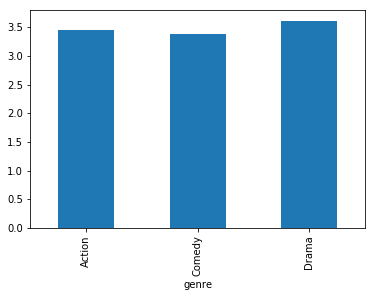

In [35]:
ratings_by_genre.plot(kind='bar')

In [36]:
ratings_by_genre.sort_values()

genre
Comedy    3.378001
Action    3.459843
Drama     3.611188
Name: rating, dtype: float64

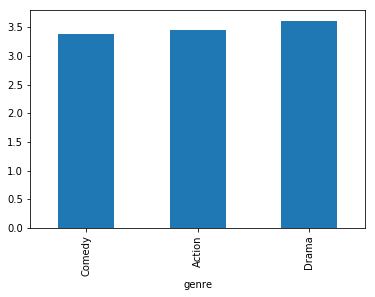

In [37]:
ratings_by_genre.sort_values().plot(kind='bar')

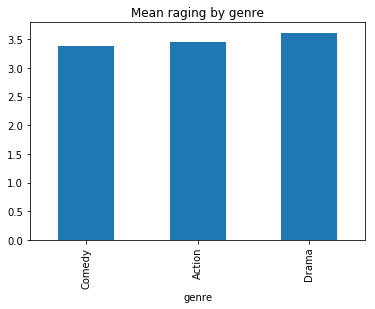

In [38]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre')

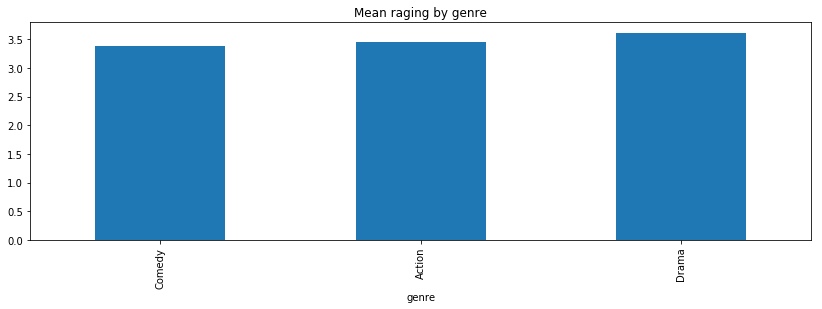

In [39]:
ratings_by_genre.sort_values().plot(kind='bar',
                                    title='Mean raging by genre',
                                    figsize=(14,4))

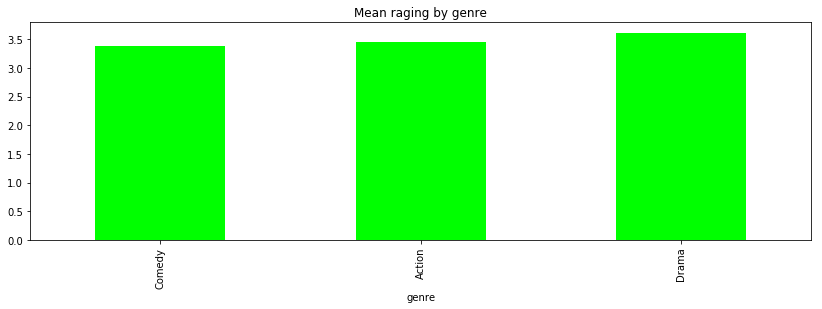

In [40]:
ratings_by_genre.sort_values().plot(kind='bar',
                                    title='Mean raging by genre',
                                    figsize=(14,4),
                                    color='lime')

#### Pivoting

In [41]:
by_year_genre = movies.groupby(['year','genre'])['rating'].mean()

In [43]:
by_year_genre

year    genre 
(2010)  Action    3.506512
        Comedy    3.330677
        Drama     3.772727
(2011)  Action    3.411215
        Comedy    3.478372
        Drama     3.541667
(2012)  Action    3.546898
        Comedy    3.337413
        Drama     3.679739
(2013)  Action    3.336842
        Comedy    3.440574
        Drama     3.666667
(2014)  Action    3.489544
        Comedy    3.358779
        Drama     3.626033
(2015)  Action    3.353511
        Comedy    3.352778
        Drama     3.429448
(2016)  Action    3.390244
        Comedy    3.140351
        Drama     3.408163
(2017)  Action    3.614224
        Comedy    3.479167
        Drama     3.364583
(2018)  Action    3.592593
        Comedy    3.423077
        Drama     2.600000
Name: rating, dtype: float64

In [44]:
by_year_genre = movies.groupby(['year','genre'])['rating'].mean().reset_index()

In [45]:
by_year_genre.head()

,year,genre,rating
0,(2010),Action,3.506512
1,(2010),Comedy,3.330677
2,(2010),Drama,3.772727
3,(2011),Action,3.411215
4,(2011),Comedy,3.478372


In [46]:
by_year_genre.sort_values('year', inplace=True)

In [47]:
by_year_genre

,year,genre,rating
0,(2010),Action,3.506512
1,(2010),Comedy,3.330677
2,(2010),Drama,3.772727
3,(2011),Action,3.411215
4,(2011),Comedy,3.478372
5,(2011),Drama,3.541667
6,(2012),Action,3.546898
7,(2012),Comedy,3.337413
8,(2012),Drama,3.679739
9,(2013),Action,3.336842


In [65]:
pivoted_df = by_year_genre.pivot(index='year', columns='genre', values='rating')

In [53]:
pivoted_df.head()

year,(2010),(2011),(2012),(2013),(2014),(2015),(2016),(2017),(2018)
genre,,,,,,,,,
Action,3.506512,3.411215,3.546898,3.336842,3.489544,3.353511,3.390244,3.614224,3.592593
Comedy,3.330677,3.478372,3.337413,3.440574,3.358779,3.352778,3.140351,3.479167,3.423077
Drama,3.772727,3.541667,3.679739,3.666667,3.626033,3.429448,3.408163,3.364583,2.600000


#### plotting groups

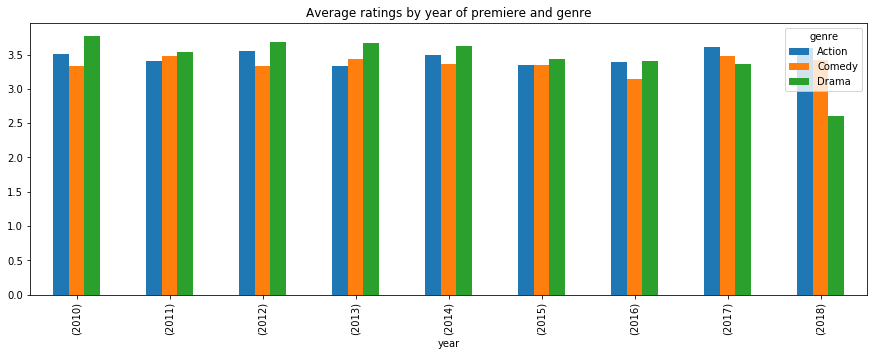

In [50]:
pivoted_df.plot(kind='bar',
                figsize=(15,5),
                title='Average ratings by year of premiere and genre')

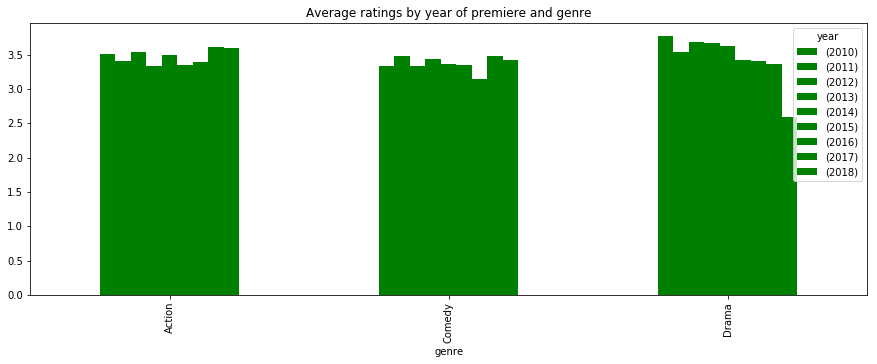

In [57]:
pivoted_df.plot(kind='bar', 
                figsize=(15,5), 
                title='Average ratings by year of premiere and genre',
               color=['g']*9)
               #colormap='winter')

#### Figures with multiple plots

In [58]:
import matplotlib.pyplot as plt

In [62]:
df = movies.groupby(['year','genre'])['userId'].nunique().reset_index()
df['year']

0     (2010)
1     (2010)
2     (2010)
3     (2011)
4     (2011)
5     (2011)
6     (2012)
7     (2012)
8     (2012)
9     (2013)
10    (2013)
11    (2013)
12    (2014)
13    (2014)
14    (2014)
15    (2015)
16    (2015)
17    (2015)
18    (2016)
19    (2016)
20    (2016)
21    (2017)
22    (2017)
23    (2017)
24    (2018)
25    (2018)
26    (2018)
Name: year, dtype: object

In [59]:
by_year_genre2 = movies.groupby(['year','genre'])['userId'].nunique().reset_index().sort_values('year')
by_year_genre2

,year,genre,userId
0,(2010),Action,176
1,(2010),Comedy,82
2,(2010),Drama,136
3,(2011),Action,113
4,(2011),Comedy,99
5,(2011),Drama,82
6,(2012),Action,142
7,(2012),Comedy,75
8,(2012),Drama,71
9,(2013),Action,85


In [63]:
pivoted_df2 = by_year_genre2.pivot(index='year', columns='genre', values='userId')
pivoted_df2

genre,Action,Comedy,Drama
year,,,
(2010),176,82,136
(2011),113,99,82
(2012),142,75,71
(2013),85,77,67
(2014),99,75,87
(2015),86,46,57
(2016),76,36,37
(2017),48,15,25
(2018),21,10,4


In [66]:
pivoted_df

genre,Action,Comedy,Drama
year,,,
(2010),3.506512,3.330677,3.772727
(2011),3.411215,3.478372,3.541667
(2012),3.546898,3.337413,3.679739
(2013),3.336842,3.440574,3.666667
(2014),3.489544,3.358779,3.626033
(2015),3.353511,3.352778,3.429448
(2016),3.390244,3.140351,3.408163
(2017),3.614224,3.479167,3.364583
(2018),3.592593,3.423077,2.600000


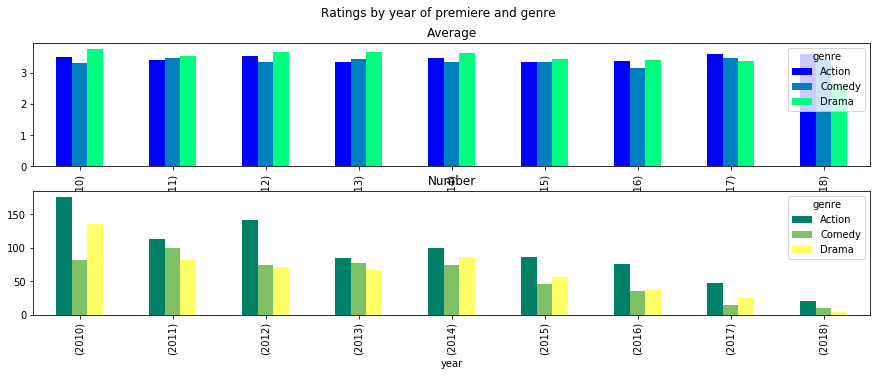

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df.plot(kind='bar',  
                title='Average',
                colormap='winter',
                ax=axes[0]
                )
pivoted_df2.plot(kind='bar', 
                figsize=(15,5), 
                title='Number',
               colormap='summer',
               ax=axes[1])
plt.show()

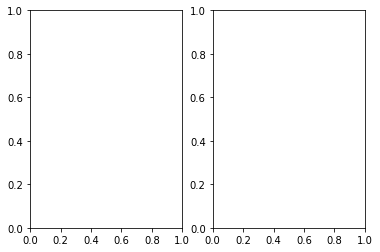

In [72]:
a,b = plt.subplots(nrows=1, ncols=2)

In [75]:
pivoted_df

genre,Action,Comedy,Drama
year,,,
(2010),3.506512,3.330677,3.772727
(2011),3.411215,3.478372,3.541667
(2012),3.546898,3.337413,3.679739
(2013),3.336842,3.440574,3.666667
(2014),3.489544,3.358779,3.626033
(2015),3.353511,3.352778,3.429448
(2016),3.390244,3.140351,3.408163
(2017),3.614224,3.479167,3.364583
(2018),3.592593,3.423077,2.600000


In [76]:
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])]

genre,Action,Comedy,Drama
year,,,
(2010),3.506512,3.330677,3.772727
(2011),3.411215,3.478372,3.541667


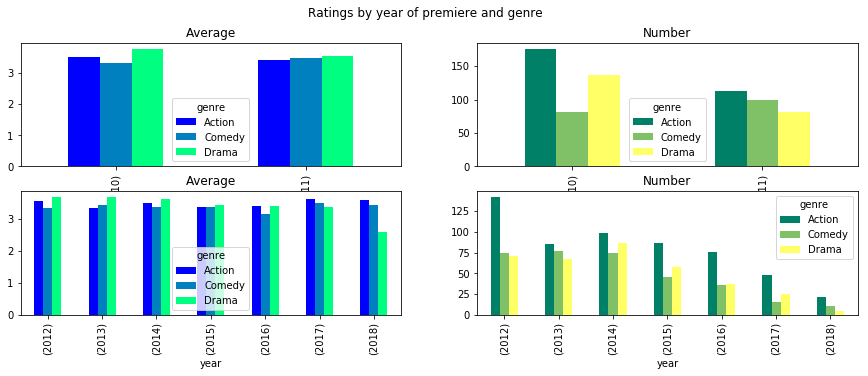

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[0,0]
                )
pivoted_df2[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Number',
               colormap='summer',
               ax=axes[0,1])
pivoted_df[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[1,0]
                )
pivoted_df2[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                figsize=(15,5), 
                title='Number',
               colormap='summer',
               ax=axes[1,1])
plt.show()

TypeError: set_figure() takes 2 positional arguments but 3 were given

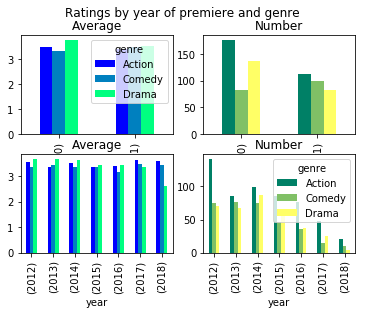

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[0,0]
                )
pivoted_df2[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Number',
               colormap='summer',
                legend=False,
               ax=axes[0,1])
pivoted_df[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                legend=False,
                ax=axes[1,0]
                )
pivoted_df2[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                #figsize=(20,15), 
                title='Number',
               colormap='summer',
               ax=axes[1,1])
fig.set_
plt.show()

## Exercise

#### Find out if there is a difference between Subscriber/Customer in daily routine

### 1 - exercise

Load the trip csv into a pandas dataframe. <br>
In the trip dataframe create a new column called 'start_datetime'. These should contain the values from column 'Start Date' converted into datetime. 

In [81]:
# Your code here
trip = pd.read_csv('trip_filled.csv')

In [87]:
trip['start_date'] = pd.to_datetime(trip['Start Date'])

In [90]:
trip.head()

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00


In [94]:
trip['start_date'].dt.strftime('%-m/%-d/%Y %-H:%M')

0          8/29/2013 14:13
1          8/29/2013 14:42
2          8/29/2013 10:16
3          8/29/2013 11:29
4          8/29/2013 12:02
5          8/29/2013 18:54
6          8/29/2013 13:25
7          8/29/2013 14:02
8          8/29/2013 17:01
9          8/29/2013 11:33
10         8/29/2013 13:52
11         8/29/2013 13:23
12         8/29/2013 19:32
13         8/29/2013 13:57
14         8/29/2013 12:31
15         8/29/2013 16:57
16         8/29/2013 11:25
17         8/29/2013 12:11
18         8/29/2013 22:21
19         8/29/2013 22:06
20         8/29/2013 19:42
21         8/29/2013 12:45
22         8/29/2013 11:40
23         8/29/2013 22:12
24         8/29/2013 10:56
25         8/29/2013 13:53
26         8/29/2013 13:43
27         8/29/2013 13:31
28         8/29/2013 21:43
29         8/29/2013 18:45
                ...       
143975    12/28/2013 12:34
143976    12/28/2013 12:35
143977    12/28/2013 12:36
143978    12/28/2013 12:40
143979    12/28/2013 12:41
143980    12/28/2013 12:42
1

### 1 - check yourself

In [92]:
if (trip['Start Date'] != trip['start_date'].dt.strftime('%-m/%-d/%Y %-H:%M')).sum() == 0:
    print('start_date column is successfully converted')
else:
    print('start_date column is NOT successfully converted')

start_date column is successfully converted


### 2 - exercise
Create new column called start_hour that contains the hour in which the trip started.

In [ ]:
# Your code here


### 2 - check yourself

In [ ]:
if trip['start_hour'].dtype == 'int64' and trip['start_hour'].min()==0 and trip['start_hour'].max()==23:
    print('start_hour column is successfully converted')
else:
    print('start_hour column is NOT successfully converted')    

### 3 - exercise
First let's check if there is a daily pattern. Group the trip data by the start_hour column and get the size of each group. Assign it to a new variable called by_hour.

In [ ]:
# Your code here


### 3 - check yourself

In [ ]:
if by_hour.index[0]==0 and by_hour[0] == 620:
    print('the grouping was successfull')
else:
    print('the grouping was NOT successfull')    

### 4 - exercise
Make a bar plot from the by_hour data. 
- The x axis should be the hour and the y the number of trips. 
- The chart should have a title
- The chart should be 10 inches wide and 5 inches tall
- The color of the columns should set to something different from the default. (You can find named colors for example here: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)

In [ ]:
# Your code here


### 4 - check yourself
Your chart should be similar to this:
<img src="exc4_cahrt.png">

### 5 - exercise
It looks like that the bikes are used most in the morning and in the afternoon. Let's check if this pattern is the same for Customers and Subscriebrs as well! <br>
Group the trip dataframe by Subscription Type ahd start_hour and get the size of each group. Reset the index and assign it to a new dataframe called by_type_hour. <br>
Rename the column with the group size to nb_trips.

In [ ]:
# Your code here


### 5 - check yourself

In [ ]:
if by_type_hour.columns[2] == 'nb_trips' and len(by_type_hour) == 48:
    print('the grouping was successfull')
else:
    print('the grouping was NOT successfull')       

### 6 - exercise
Pivot the by_type_hour dataframe. The pivoted dataframe should be called by_type_hour_pivot. The indeces should be the hours, the columns the subscription types (Customer and Subscriber) and the values the number of trips.

In [ ]:
# Your code here


### 6 - check yourself

In [ ]:
if by_type_hour_pivot.columns.name == 'Subscription Type' and len(by_type_hour_pivot) == 24:
    print('the pivoting was successfull')
else:
    print('the pivoting was NOT successfull')      

### 7 - exercise

Make a bar plot from the by_type_hour_pivot data.

- The x axis should be the hour and the y the number of trips.
- The chart should have a title
- The chart should be 10 inches wide and 5 inches tall
- The Customer and the Subscriber bars should have different colors from one colormap other than the default. (You can find named colormaps for example here: https://matplotlib.org/tutorials/colors/colormaps.html)

In [ ]:
# Your code here


### 7 - check yourself
Your chart should be similar to this:
<img src="exc7_chart.png">

### 8 - exercise

Ok, it looks like that Subscribers use the bikes for commuting while Customers use the bikes more during the day. Let's see if these patterns are different in the weekend and on weekdays! <br>
As we are about to introduce a new grouping variable we can't use the aggregated data we created in the last tasks. So let's go back to the trip dataframe and create a new column called day_of_week with the name of the day of the start_date. Remember you can use the built-in methods of the .dt properties of the datetime like columns. 

In [ ]:
# Your code here


### 8 - check yourself

In [ ]:
if sorted(trip['day_of_week'].unique()) == ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']:
    print('the column creation was successfull')
else:
    print('the column creation was NOT successfull')      

### 9 - exercise
We know the name of the days of each date now. Let's crate a column called weekend. If the name of the day is Saturday or Sunday, the value of weekend should be True. Otherwise it should be False.

In [ ]:
# Your code here


### 9 - check yourself

In [ ]:
if trip['weekend'].sum() == 22980:
    print('the column creation was successfull')
else:
    print('the column creation was NOT successfull')      

### 10 - exercise
Create a figure with two charts next to each others. 
- One should show the number of trips by hours for Customers and Subsribers on the weekends and the other on the weekdays. 
- Both charts should have a title and they should have a shared y axes. 
- There should be a shared title in the middle above the charts <br><br>
For creating the charts you have to filter the trip data for weekend/weekday first and than pivot the new dataframe. <br><br>
As an advanced task you can make a figure with 4 plots: in the first row the weekends and weekdays should be separate charts with differenc colored bars for Customers and Subscribers. In the second row, the columns should be for the weekends/weekdays on separate charts for Customers and Subscribers. The charts should share both axes and only the charts on the left should have the legend explanation box

In [ ]:
# Your code here


### 7 - check yourself
Your chart should be similar to this:
<img src="exc10_chart.png">
<br><br>Or to this if you chose the advanced task:
<img src="exc10_chart_advance.png">

### +1 - exercise
Include the month of the start_date in the analysis and create a figure showing some insight. <br>
Save the figure as a picture.

In [ ]:
# Your code here


In [99]:
'a' in ['a','b']

True

In [98]:
trip['Start Station'].isin(['a','b'])

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
143975    False
143976    False
143977    False
143978    False
143979    False
143980    False
143981    False
143982    False
143983    False
143984    False
143985    False
143986    False
143987    False
143988    False
143989    False
143990    False
143991    False
143992    False
143993    False
143994    False
143995    False
143996    False
143997    False
143998    False
143999    False
144000    False
144001    False
144002    False
144003    False
144004    False
Name: Start Station, Len